## Importación librerias

In [429]:

import pandas as pd
import numpy as np


import reverse_geocoder as rg
import pycountry



from IPython.display import display 





## Comprobación entorno
Terminal, Kernel y notebook mismo entorno


In [430]:
import sys, os
print(sys.executable)          
print(os.environ.get("VIRTUAL_ENV"))  


c:\Users\Propietario\Desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv\Scripts\python.exe
C:\Users\Propietario\desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv


# ****1er. Dataset . Carga de datos. Información****

In [431]:
df_customer = pd.read_excel("../Data/Raw/customer-details.xlsx")

Uno todas las hojas del Excell

In [432]:
df_customer = pd.concat(
    pd.read_excel("../Data/Raw/customer-details.xlsx", sheet_name=None).values(),
    ignore_index=True
)


In [433]:
df_customer. sample(10)

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
9051,9051,30916,0,1,2012-12-18,5,a2cd6a96-49ac-4760-abd7-fcf9e7ca51c8
8928,8928,112966,0,1,2012-11-20,23,670269c8-e44c-4108-bdf8-8d3eaa1ca07f
21199,1084,86791,1,1,2013-11-22,23,6f8c6fe2-2745-448f-9ceb-4dead458df63
32683,3603,171691,1,0,2014-10-24,18,3a69ee5f-5d34-4c63-b68c-34ccb3ec26b4
32264,3184,129028,1,1,2014-05-29,21,8548d2bb-639d-4be7-bdb4-28719fee19b0
16498,16498,112029,1,2,2012-01-11,21,6d1c4e90-d87c-4dc0-a2eb-9ea065a8e10c
13993,13993,23160,0,0,2012-12-26,32,1a016457-cf1e-4d17-9a01-d6c4a6ccd0d0
8674,8674,10092,2,2,2012-06-26,31,66d38005-84ab-4444-ae7e-3b70295373a9
41910,12830,161772,0,2,2014-03-29,32,ca20fedf-e946-40ec-9f65-74dd49a301fa
37048,7968,111455,1,2,2014-04-13,16,9c3f101d-50d1-43fc-909a-36addae3563d


In [434]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


# Columnas e información

0. Unnamed: 0 (int64)

No es una variable útil: se puede eliminar.

1. Income (int64)

Ingresos de la persona/cliente: análisis socioeconómico

2. Kidhome (int64)

Número de hijos pequeños en el hogar: variable numérica

3. Teenhome (int64)

Número de adolescentes en el hogar: variable numérica

4. Dt_Customer (datetime64)

Fecha en la que el cliente se unió / fue registrado: antiguedad.

5. NumWebVisitsMonth (int64)

Número de visitas web al mes: comportamiento online.

6. ID (object)

Identificador único del cliente: clave primaria.




# ****LIMPIEZA Y TRANSFORMACIÓN****

# 1. Eliminar Unnamed

1. Ver todas las columnas
2. Quito cualquier columna que empiece por Unnamed
3. Confirmo resultado


In [435]:

print(df_customer.columns)

df_customer = df_customer.loc[:, ~df_customer.columns.str.contains('^Unnamed')]

print(df_customer.columns)



Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'ID'],
      dtype='object')
Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID'],
      dtype='object')


# 2. Revisar duplicados de id

1. Nº de IDs totales
2. Nº de IDs únicos
3. Nº de duplicados

In [436]:
total_ids = df_customer['ID'].shape[0]

unique_ids = df_customer['ID'].nunique()

duplicated_ids = total_ids - unique_ids

print("Total de registros:", total_ids)
print("IDs únicos:", unique_ids)
print("Duplicados:", duplicated_ids)


Total de registros: 43170
IDs únicos: 43170
Duplicados: 0


# 3. Distribución de Income

1. Aseguro tipo numérico y revisa nulos
2. Chequeos rápidos de calidad
3. Detección de outliers (regla IQR): No se detectan outliers en la variable Income según la regla IQR y percentiles (p01–p99). Se mantiene la variable sin modificaciones.
4. Umbrales percentil
5. Boxplot de Income

In [437]:
#1. Aseguro tipo numérico y reviso nulos
df_customer['Income'] = pd.to_numeric(df_customer['Income'], errors='coerce')

print(df_customer['Income'].dtype)
print('Nulos en Income:', df_customer['Income'].isna().sum())
df_customer['Income'].describe()


int64
Nulos en Income: 0


count     43170.000000
mean      93227.389622
std       50498.181989
min        5841.000000
25%       49608.000000
50%       93009.500000
75%      136740.500000
max      180802.000000
Name: Income, dtype: float64

In [438]:
# 2. Chequeos rápidos de calidad
print('<=0:', (df_customer['Income'] <= 0).sum())

df_customer['Income'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])


<=0: 0


0.25     49608.00
0.50     93009.50
0.75    136740.50
0.90    163197.40
0.95    172366.75
0.99    179057.00
Name: Income, dtype: float64

In [439]:
# 3. Detección de outliers (regla IQR)
q1 = df_customer['Income'].quantile(0.25)
q3 = df_customer['Income'].quantile(0.75)
iqr = q3 - q1
low  = q1 - 1.5*iqr
high = q3 + 1.5*iqr

df_customer['income_outlier_iqr'] = ~df_customer['Income'].between(low, high)
df_customer['income_outlier_iqr'].value_counts()


income_outlier_iqr
False    43170
Name: count, dtype: int64

In [440]:
# 4. Umbrales percentil
p01 = df_customer['Income'].quantile(0.01)
p99 = df_customer['Income'].quantile(0.99)




Realizo un boxplot income como verificación visual de la distribución y confirmación de que no existen outliers

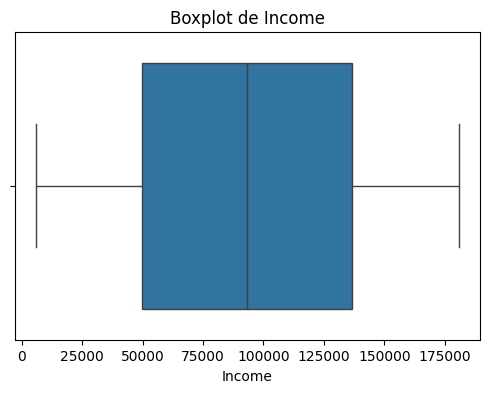

In [441]:
#5. Boxplot de income
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Income'])
plt.title('Boxplot de Income')
plt.show()





# 4. Distribución de Kidhome y Teenhome: hogares sin hijos, con hijos.
1. Importo Numpy
2. Conviero las columnas en nº enteros, errores en NaN.
3. Distribución y nulos
4. Total de hijos. Creo variable deribada.


In [442]:
# 2. Convierto en nº enteros, errores.

for c in ['Kidhome','Teenhome']:
    df_customer[c] = pd.to_numeric(df_customer[c], errors='coerce').astype('Int64')


In [443]:
# 3. Distribución básica y nulos

for c in ['Kidhome','Teenhome']:
    print(f"{c}  - nulos:", df_customer[c].isna().sum())
    print(df_customer[c].value_counts(dropna=False).sort_index(), "\n")

Kidhome  - nulos: 0
Kidhome
0    14270
1    14425
2    14475
Name: count, dtype: Int64 

Teenhome  - nulos: 0
Teenhome
0    14402
1    14425
2    14343
Name: count, dtype: Int64 



In [444]:
# 4. Total de hijos
df_customer['Children_total'] = (df_customer['Kidhome'] . fillna(0) +
                                                    df_customer['Teenhome'] . fillna(0)). astype ('int64')


Confirmo la creación de la columna =total children

In [445]:
df_customer. sample(20)


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total
4861,179201,0,1,2012-06-05,17,2efe5806-6e06-4ade-a42b-0f2232a43e62,False,1
31969,74455,2,0,2014-06-13,24,975dca64-876b-4576-b58f-ba31d8f552fa,False,2
33217,123090,2,1,2014-10-02,9,5218caec-3410-4862-bfcf-72bc31208b06,False,3
10372,132714,2,0,2012-06-04,19,cd5167e9-ac52-415f-8a19-857f23c79499,False,2
285,9559,2,1,2012-10-26,23,fa5037d1-f5d5-4293-871f-4dd2ecf9ad06,False,3
13294,172348,1,0,2012-02-25,20,773df7f1-9df1-4f7a-bf33-3837960effc1,False,1
25287,30408,2,1,2013-11-02,2,6cc0213a-e2f0-40e4-b6ef-6ed7a15f4d37,False,3
34360,52846,0,0,2014-01-03,31,6f330f4d-b4d0-4903-85e7-65f737a26be2,False,0
4771,174934,1,2,2012-01-11,32,b51efa8e-fc7c-47e6-95ab-0e29b9afd416,False,3
37498,24499,1,1,2014-01-25,3,e06a7c55-16a1-4e1f-a518-4fdd12374764,False,2


Realizo un boxplot de la variable Children_total como verificación visual de la distribución y confirmación de que no existen outliers.

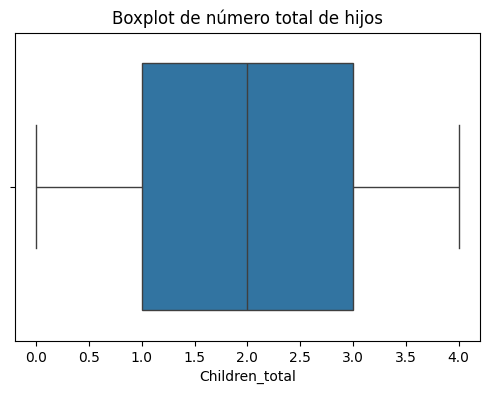

In [446]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Children_total'])
plt.title("Boxplot de número total de hijos")
plt.show()

# 5. Antiguedad del cliente. Creo columna.
1. Aseguro que la columna es tipo fecha
2. Fecha de referencia hoy
3. Creo columna con años antiguedad
4. Compruebo resultado

In [447]:
df_customer["Dt_Customer"] = pd.to_datetime(df_customer["Dt_Customer"], errors="coerce")   
ref_date = pd.Timestamp.today().normalize()
df_customer["Customer_Tenure_Years"] = ((ref_date - df_customer["Dt_Customer"]).dt.days // 365).astype("Int64")
df_customer[["Dt_Customer", "Customer_Tenure_Years"]].head()



,Dt_Customer,Customer_Tenure_Years
0,2012-04-04,13
1,2012-12-30,12
2,2012-02-02,13
3,2012-12-21,12
4,2012-06-20,13


In [448]:
df_customer. sample(20)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total,Customer_Tenure_Years
11763,67384,0,0,2012-09-18,25,bb93a5c4-ed83-48e9-aad6-af57d2071d20,False,0,12
37358,176930,0,1,2014-07-07,13,234a7933-86b2-4e31-898e-2b296394b9bc,False,1,11
2684,117525,1,2,2012-08-06,4,012cb307-f2b3-4377-8525-29a788fb4206,False,3,13
15915,171616,0,0,2012-11-07,15,3561b866-2895-4f26-bc61-da17d5654eaf,False,0,12
24093,37474,2,0,2013-01-11,13,489560d0-cebf-40b5-9933-eefca887eead,False,2,12
14715,31845,1,1,2012-12-02,12,e133d12c-1b12-4140-bd02-df53094b4d82,False,2,12
25851,141352,0,1,2013-10-05,24,327a3d53-b838-479b-b7d3-bdbc88aa93f7,False,1,11
38846,32176,1,1,2014-04-16,19,d140a1f5-e4e3-44b9-9eec-7c99de9b56aa,False,2,11
2112,119248,0,2,2012-07-24,18,08914f32-ad3d-4ec0-9496-0c5a9d483b6b,False,2,13
431,100982,2,1,2012-12-21,5,c6fefb0d-7c79-480b-99ce-88638caa840e,False,3,12


# 6. Nº Visitas. Visualizo

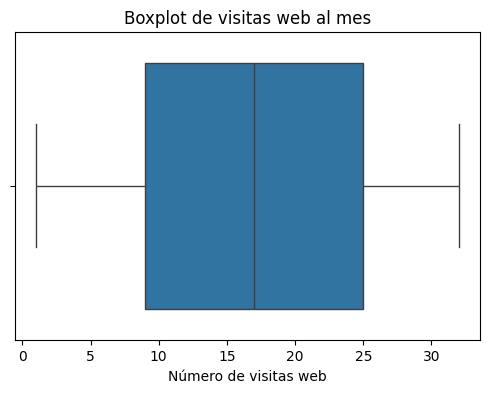

In [449]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer["NumWebVisitsMonth"])
plt.title("Boxplot de visitas web al mes")
plt.xlabel("Número de visitas web")
plt.show()

In [450]:
# Visualizo como queda despues de limpieza y transformación

df_customer.info()
df_customer.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Income                 43170 non-null  int64         
 1   Kidhome                43170 non-null  Int64         
 2   Teenhome               43170 non-null  Int64         
 3   Dt_Customer            43170 non-null  datetime64[ns]
 4   NumWebVisitsMonth      43170 non-null  int64         
 5   ID                     43170 non-null  object        
 6   income_outlier_iqr     43170 non-null  bool          
 7   Children_total         43170 non-null  int64         
 8   Customer_Tenure_Years  43170 non-null  Int64         
dtypes: Int64(3), bool(1), datetime64[ns](1), int64(3), object(1)
memory usage: 2.8+ MB


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total,Customer_Tenure_Years
19049,141999,0,2,2012-06-02,12,cbf32f79-f702-40d0-ac91-331f5c78a581,False,2,13
1236,148257,0,1,2012-10-17,32,117a7ece-3885-44e0-8ea1-446ca5cf396f,False,1,12
38184,86145,1,1,2014-02-03,21,a3bb96b2-a933-44c9-b564-5e19e3047819,False,2,11
8091,178144,0,0,2012-07-27,3,5ee508fc-8712-43bd-91ce-a8b83e417aef,False,0,13
17140,38666,1,0,2012-03-10,28,56c8582b-9386-4a00-88a8-5d93f965cdea,False,1,13
31495,169146,0,0,2014-06-18,21,5ccc18c3-8f51-470a-bac0-7a4db628ad6d,False,0,11
3797,22203,0,0,2012-02-27,20,911cb33d-7600-4f48-b61b-d33b2bafaf46,False,0,13
19712,31478,0,1,2012-03-21,7,0379931a-3fc4-42f5-9b48-225a1eb7ea32,False,1,13
41688,159983,1,2,2014-04-29,29,a595175f-1a8d-4f5d-82ff-e16ad9214833,False,3,11
39716,46720,0,0,2014-08-11,6,651510b6-4795-4327-b6f1-08e5fcfa9ccb,False,0,11


# ****2º Dataset. Carga de datos. Información****

In [451]:
df_bank = pd.read_csv("../Data/Raw/bank-additional.csv")

In [452]:
df_bank. sample(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
8565,8662,45.0,services,MARRIED,basic.6y,0.0,NaN,NaN,telephone,173,10,999,0,NONEXISTENT,1.4,"94,465","-41,8","4,864","5228,1",no,28-marzo-2015,35.530,-73.920,4e4b1c19-d01d-4603-9c0d-7cc022b5ad1c
22392,22489,32.0,admin.,SINGLE,high.school,0.0,1.0,0.0,cellular,136,1,999,0,NONEXISTENT,1.4,"93,444","-36,1","4,964","5228,1",no,28-junio-2017,32.866,-88.334,ac828aff-7019-4761-9264-56a2a2138392
25069,25191,NaN,management,MARRIED,high.school,0.0,1.0,1.0,cellular,174,3,999,0,NONEXISTENT,-0.1,"93,2",-42,"4,153","5195,8",no,20-septiembre-2019,45.605,-91.086,ef9058d6-1bfb-4600-9f1c-d7a3096be59e
37218,37385,27.0,admin.,SINGLE,university.degree,0.0,1.0,0.0,cellular,429,2,999,0,NONEXISTENT,-2.9,"92,201","-31,4","0,879","5076,2",yes,17-diciembre-2019,49.347,-102.909,d64a312b-11b7-418e-b26e-87c9d50f8506
38414,38581,NaN,admin.,SINGLE,university.degree,0.0,1.0,1.0,telephone,70,3,999,0,NONEXISTENT,-3.4,"92,431","-26,9",NaN,"5017,5",no,15-noviembre-2019,39.934,-101.934,544261e9-6d68-4f14-b3c4-24caab498c55
11762,11859,47.0,admin.,MARRIED,basic.9y,0.0,1.0,0.0,telephone,9,7,999,0,NONEXISTENT,1.4,"94,465","-41,8","4,959","5228,1",no,31-enero-2015,45.860,-103.767,072b6f55-9708-4336-bbbc-6c58a860355f
15613,15710,32.0,admin.,SINGLE,high.school,NaN,0.0,0.0,cellular,590,3,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,96","5228,1",yes,1-diciembre-2016,46.523,-88.646,b5c22c9d-3a5b-4a14-9d36-162dcbe2e494
23914,24036,26.0,entrepreneur,MARRIED,basic.9y,0.0,1.0,0.0,telephone,5,1,999,0,NONEXISTENT,-0.1,"93,798","-40,4",NaN,"5195,8",no,4-septiembre-2019,40.954,-85.460,89bbfad3-a855-4ad5-9184-62f501061b8a
39560,39727,20.0,student,SINGLE,NaN,0.0,0.0,0.0,cellular,202,2,12,1,SUCCESS,-1.8,"93,876",-40,"0,697","5008,7",yes,7-diciembre-2015,25.890,-104.414,7d725179-3951-4051-847a-7a47d5017dd9
36141,36308,28.0,self-employed,SINGLE,university.degree,0.0,0.0,0.0,cellular,373,2,999,0,NONEXISTENT,-2.9,"92,963","-40,8","1,266","5076,2",no,1-marzo-2017,34.384,-84.348,2b64ccb3-fe72-4276-b24f-8ac3f12adb3b


In [453]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

## Visualizo toda la información, nulos y tipo de dato

In [454]:
resumen = pd.DataFrame({
    "Non-Null Count": df_bank.notna().sum(),
    "Null Count": df_bank.isna().sum(),
    "Dtype": df_bank.dtypes
})
print(resumen)


                Non-Null Count  Null Count    Dtype
Unnamed: 0               43000           0    int64
age                      37880        5120  float64
job                      42655         345   object
marital                  42915          85   object
education                41193        1807   object
default                  34019        8981  float64
housing                  41974        1026  float64
loan                     41974        1026  float64
contact                  43000           0   object
duration                 43000           0    int64
campaign                 43000           0    int64
pdays                    43000           0    int64
previous                 43000           0    int64
poutcome                 43000           0   object
emp.var.rate             43000           0  float64
cons.price.idx           42529         471   object
cons.conf.idx            43000           0   object
euribor3m                33744        9256   object
nr.employed 

# Columnas e información 

0. Unnamed:  se puede eliminar

1. age (float64): edad de la persona.

2. job (object): profesión.

3. marital (object): estado civil.

4. education (object): educación.

5. default (float64): si el cliente tiene crédito con impago (posibles nulos).

6. housing (float64): si tiene préstamo hipotecario (posibles nulos).

7. loan (float64): si tiene préstamo personal (posibles nulos).

8. contact (object): tipo de contacto.

9. duration (int64): duración de la llamada/contacto en segundos. 

10. campaign (int64):  número de veces que se ha contactado al cliente. 

11. pdays (int64): días desde el último contacto (999 significa que nunca se contactó). 

12. previous (int64): número de contactos anteriores. 

13. poutcome (object): resultado de campaña de marketing anterior. 

14. emp.var.rate (float64): indicador económico (tasa de variación del empleo).

15. cons.price.idx (object): indice de precios del consumidor. 

16. cons.conf.idx (object): indice de confianza del consumidor. 

17. euribor3m (object): tasa de interés euríbor a 3 meses. 

18. nr.employed (object): número de empleados (indicador económico). 

19. y (object): variable objetivo (si el cliente contrató o no el producto/servicio).

20. Date: fecha de interacción con el cliente.

21. latitude (float64): localización geográfica.

22. longitude (float64): localización geográfica.

23. id (object): identificador único del cliente.








# ****LIMPIEZA Y TRANSFORMACIÓN****

# 1. Eliminamos columna Unnamed

In [455]:
df_bank = df_bank.drop(columns=["Unnamed: 0"])

# Comprobar columnas resultantes
print(df_bank.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'id_'],
      dtype='object')


# 2. Columna age, tenemos 12% aprox. de nulos. 
1. Visualizo: edades entre 30 y 50 años, mediana aprox. 40 años (38), de 18 a 20 años los más jóvenes, mayores apox 70 años. Hay clientes con edades entre los 70 y 100 años. 
2. Reemplazo nulos por la mediana

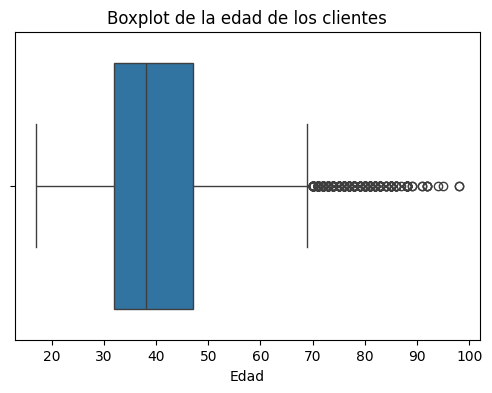

In [456]:
# Visualizo
plt.figure(figsize=(6,4))
sns.boxplot(x=df_bank["age"].dropna())
plt.title("Boxplot de la edad de los clientes")
plt.xlabel("Edad")
plt.show()

In [457]:
# Reemplazo nulos por mediana 38 años
# Calcular la mediana de la edad (ignorando nulos)
mediana_age = df_bank["age"].median()

# Rellenar los nulos con la mediana
df_bank["age"] = df_bank["age"].fillna(mediana_age)

# Compruebo que ya no hay nulos en la columna age
print("Nulos en edad después de imputar:", df_bank["age"].isna().sum())
print("Mediana usada:", mediana_age)


Nulos en edad después de imputar: 0
Mediana usada: 38.0


In [458]:
# visulizo la información de nuevo
resumen = pd.DataFrame({
    "Non-Null Count": df_bank.notna().sum(),
    "Null Count": df_bank.isna().sum(),
    "Dtype": df_bank.dtypes
})
print(resumen)


                Non-Null Count  Null Count    Dtype
age                      43000           0  float64
job                      42655         345   object
marital                  42915          85   object
education                41193        1807   object
default                  34019        8981  float64
housing                  41974        1026  float64
loan                     41974        1026  float64
contact                  43000           0   object
duration                 43000           0    int64
campaign                 43000           0    int64
pdays                    43000           0    int64
previous                 43000           0    int64
poutcome                 43000           0   object
emp.var.rate             43000           0  float64
cons.price.idx           42529         471   object
cons.conf.idx            43000           0   object
euribor3m                33744        9256   object
nr.employed              43000           0   object
y           

# 3. Columna job. Reemplazo nulos por "desconocido".  Convierto a español.

In [459]:
df_bank['job'] = df_bank['job'].fillna('desconocido')

# Traduzco a español
df_bank['job'] = df_bank['job'].replace({
    'housemaid': 'empleada hogar',
    'services': 'servicios',
    'admin.': 'administrativo',
    'blue-collar': 'obrero',
    'technician': 'técnico',
    'retired': 'jubilado',
    'management': 'directivo',
    'unemployed': 'desempleado',
    'self-employed': 'autónomo',
    'entrepreneur': 'emprendedor',
    'student': 'estudiante',
    'desconocido': 'desconocido'
})


#visualizo categorías únicas

print(df_bank['job'].unique())

['empleada hogar' 'servicios' 'administrativo' 'obrero' 'técnico'
 'jubilado' 'directivo' 'desempleado' 'autónomo' 'desconocido'
 'emprendedor' 'estudiante']


# 4. Columna Marital. Reemplazo nulos por "desconocido". Convierto todo en minúsculas y quito espacios

In [460]:
df_bank['marital'] = df_bank['marital'].fillna('desconocido').replace('', 'desconocido')

#visualizo categorías únicas

print(df_bank['marital'].unique())

# Covertimos en minúsculas y quitamos espacios al principio

df_bank['marital'] = df_bank['marital'].str.strip().str.lower()

# Traduzco a español
df_bank['marital'] = df_bank['marital'].replace({
    'married': 'casado',
    'single': 'soltero',
    'divorced': 'divorciado',
    'desconocido': 'desconocido'
})


# vuelvo a visualizar
print(df_bank['marital'].unique())



['MARRIED' 'SINGLE' 'DIVORCED' 'desconocido']
['casado' 'soltero' 'divorciado' 'desconocido']


# 5. Columna Education. Cambio nulos por "desconocido". Convertimos en minúsculas y quito espacios. Agrupo categorías

In [461]:
df_bank['education'] = df_bank['education'].str.strip().str.lower()

#cambio nulos por desconocido
df_bank['education'] = df_bank['education'].replace('', 'desconocido').fillna('desconocido')



#agrupo categorías

df_bank['education'] = df_bank['education'].replace({
    'basic.4y': 'basico',
    'basic.6y': 'basico',
    'basic.9y': 'basico',
    'high.school': 'secundaria',
    'university.degree': 'universidad',
    'professional.course': 'profesional',
    'illiterate': 'sin_estudios',
    'desconocido': 'desconocido'
})
#visualizo. Confirmo todo lo hecho anteriormente

print(df_bank['education'].unique())
df_bank.info()


['basico' 'secundaria' 'profesional' 'desconocido' 'universidad'
 'sin_estudios']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 

# 6. Columna default. Cambio los nulos por "desconocido". Convierto valores en string, elimino espacios y todo minuscula. Convierto en si, no o desconocido. 

In [462]:
# Reemplazamos nulos por desconocido
df_bank['default'] = df_bank['default'].fillna('desconocido')

# Convierto valores en string, eliminamos espacios en blanco y en minúscula

df_bank['default'] = df_bank['default'].astype(str).str.strip().str.lower()

# Convierto a objeto

df_bank['default'] = df_bank['default'].replace({
    '0.0': 'no',
    '1.0': 'sí',
    'desconocido': 'desconocido'
})

#reviso resultado
print(df_bank['default'].unique())
df_bank.info()

['no' 'desconocido' 'sí']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         43000 non-null  object 
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.em

# 7. Columna housing. Cambio nulos por "desconocido". Convierto valores en string, elimino espacios y minuscula. Convierto en si, no o desconocido.

In [463]:
# Cambio nulos por desconocido

df_bank['housing'] = df_bank['housing'].fillna('desconocido')

# Convierto valores en string, elimino espacios y minuscula

df_bank['housing'] = df_bank['housing'].astype(str).str.strip().str.lower()

# Convierto a objeto

df_bank['housing'] = df_bank['housing'].replace({
    '0.0': 'no',
    '1.0': 'sí',
    'desconocido': 'desconocido'
})
# visualizo

print(df_bank['housing'].unique())
df_bank.info()



['no' 'sí' 'desconocido']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         43000 non-null  object 
 5   housing         43000 non-null  object 
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.em

# 8. Columna loan. Cambio nulos por "desconocido". Convierto valores en string, elimino espacios y minuscula. Convierto en si, no o desconocido.

In [464]:
df_bank['loan'] = df_bank['loan'].fillna('desconocido')

# Convierto valores en string, elimino espacios y minuscula

df_bank['loan'] = df_bank['loan'].astype(str).str.strip().str.lower()

# Convierto a objeto

df_bank['loan'] = df_bank['loan'].replace({
    '0.0': 'no',
    '1.0': 'sí',
    'desconocido': 'desconocido'
})
# visualizo

print(df_bank['loan'].unique())
df_bank.info()

['no' 'sí' 'desconocido']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         43000 non-null  object 
 5   housing         43000 non-null  object 
 6   loan            43000 non-null  object 
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.em

# 9. Columna contact, traduzco a español. No hay nulos.

In [465]:
df_bank['contact'] = df_bank['contact'].replace({
    'cellular': 'móvil',
    'telephone': 'teléfono fijo'
})

print(df_bank['contact'].unique())

['teléfono fijo' 'móvil']


# 10. Columna duration lo convierto en minutos.

In [466]:
# Convierto de segundos a minutos
df_bank['duration'] = (df_bank['duration'] / 60).round(2)

print(df_bank['duration'].head())

0    4.35
1    2.48
2    3.77
3    2.52
4    5.12
Name: duration, dtype: float64


# 11. Columna pdays, tenemos valores del 1 al 27 que es con contacto,  0 y 999 que entiendo que es sin contacto. Transformo columna en datos contacto o no contacto. 

In [467]:
# Transformamos la columna pdays en 'contacto' / 'no_contacto'
df_bank['pdays'] = df_bank['pdays'].apply(lambda x: 'no_contacto' if x in [0, 999] else 'contacto')

# Revisamos resultado
print(df_bank['pdays'].unique())
print(df_bank['pdays'].value_counts())


['no_contacto' 'contacto']
pdays
no_contacto    41427
contacto        1573
Name: count, dtype: int64


In [468]:
#Visualizo 
df_bank.sample(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
33624,29.0,administrativo,soltero,secundaria,no,no,no,móvil,4.83,1,no_contacto,0,NONEXISTENT,-1.8,"92,893","-46,2","1,281","5099,1",no,12-octubre-2019,30.379,-105.268,b0029578-72e6-41c1-9bb5-88097a696d2b
14517,52.0,obrero,divorciado,desconocido,no,no,no,móvil,1.85,8,no_contacto,0,NONEXISTENT,1.4,"93,918","-42,7","4,961","5228,1",no,10-agosto-2015,32.142,-123.448,5b066658-c6d6-4926-b031-d72ba104790a
11316,30.0,obrero,soltero,basico,no,sí,no,teléfono fijo,0.98,3,no_contacto,0,NONEXISTENT,1.4,"94,465","-41,8","4,959","5228,1",no,21-julio-2019,34.956,-71.671,7234b16a-ad77-4edc-b2c7-50c930c76f59
32840,32.0,emprendedor,casado,basico,no,no,no,móvil,3.07,4,no_contacto,0,NONEXISTENT,-1.8,"92,893","-46,2","1,299","5099,1",no,13-enero-2019,43.885,-68.293,8424e9f4-28b6-4025-8d4d-735dc0471777
34082,25.0,obrero,casado,basico,no,no,no,móvil,3.35,3,no_contacto,0,NONEXISTENT,-1.8,"92,893","-46,2","1,281","5099,1",no,12-febrero-2015,48.667,-83.242,e08b4144-bbc5-4851-a383-3e38e3947f5c
4650,28.0,directivo,casado,secundaria,desconocido,sí,no,teléfono fijo,4.15,1,no_contacto,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,24-febrero-2017,45.956,-77.485,e74acb9f-66fb-400e-97cc-d33a709f6e86
4251,45.0,obrero,casado,basico,desconocido,no,no,teléfono fijo,2.02,1,no_contacto,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,24-febrero-2016,39.979,-102.968,ef082132-7542-4757-b85a-9b512a90be73
20753,38.0,administrativo,casado,universidad,no,sí,sí,móvil,1.12,1,no_contacto,0,NONEXISTENT,1.4,"93,444","-36,1","4,964","5228,1",no,27-abril-2016,47.133,-83.121,32451142-cf57-4415-90cb-527c06cb60d5
41255,45.0,técnico,divorciado,profesional,no,no,no,móvil,1.27,1,no_contacto,0,NONEXISTENT,1.4,"93,444","-36,1","4,962","5228,1",no,NaN,35.813,-107.956,75417302-d138-4394-be0d-49cb2005d366
16121,38.0,empleada hogar,casado,basico,desconocido,sí,no,móvil,4.72,6,no_contacto,0,NONEXISTENT,1.4,"93,918","-42,7","4,961","5228,1",no,2-abril-2016,37.297,-81.173,8b6900b2-610c-4ce2-a473-4dca205f748f


# 12. Columna poutcome, tenemos 3 valores. Traduzco.

In [469]:
# Normalizo a minusculas
df_bank['poutcome'] = df_bank['poutcome'].str.strip().str.lower()

df_bank['poutcome'] = df_bank['poutcome'].replace({
    'success': 'éxito',
    'failure': 'fracaso',
    'nonexistent': 'inexistente'
})

# Reviso resultado
print(df_bank['poutcome'].unique())
print(df_bank['poutcome'].value_counts())


['inexistente' 'fracaso' 'éxito']
poutcome
inexistente    37103
fracaso         4461
éxito           1436
Name: count, dtype: int64


# 13. Columna emp. var. rate, lo transformo en categorías de tendencia.

In [470]:
# Transformo
df_bank['emp.var.rate'] = df_bank['emp.var.rate'].apply(
    lambda x: 'caída empleo' if x < 0 else 'crecimiento empleo'
)


#Visualizo
df_bank.sample(10)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
19868,58.0,administrativo,casado,secundaria,no,no,no,móvil,8.80,1,no_contacto,0,inexistente,crecimiento empleo,"93,444","-36,1","4,966","5228,1",no,18-febrero-2017,27.734,-74.009,561cbda4-50d0-4d9c-b3cc-ab09561eb4e7
27232,40.0,directivo,casado,universidad,no,no,no,móvil,6.33,2,no_contacto,0,inexistente,caída empleo,"93,2",-42,"4,021","5195,8",no,13-abril-2017,43.619,-81.623,738c578b-e23e-429b-81ea-219127834fcf
37430,76.0,jubilado,casado,profesional,no,no,no,móvil,5.13,1,contacto,1,éxito,caída empleo,"92,201","-31,4","0,861","5076,2",yes,21-agosto-2018,41.326,-95.635,bceb80ae-7a05-4351-a631-50873ed22d9b
10930,38.0,directivo,casado,secundaria,no,no,no,teléfono fijo,0.80,10,no_contacto,0,inexistente,crecimiento empleo,"94,465","-41,8",NaN,"5228,1",no,9-abril-2019,29.242,-90.665,2f084072-532a-4bd6-b65d-9b65b01bc13f
32082,45.0,técnico,soltero,universidad,no,no,no,móvil,12.72,1,no_contacto,0,inexistente,caída empleo,"92,893","-46,2","1,313","5099,1",no,13-julio-2016,42.674,-91.594,4d88a262-1bc5-4a69-a6f2-eb4a99b91379
54,55.0,obrero,casado,basico,desconocido,no,no,teléfono fijo,4.48,2,no_contacto,0,inexistente,crecimiento empleo,"93,994","-36,4","4,857",5191,no,24-julio-2016,33.009,-115.680,a53d19c6-cc04-4e56-936c-2af714cb0691
6603,36.0,obrero,casado,basico,desconocido,no,no,teléfono fijo,2.15,2,no_contacto,0,inexistente,crecimiento empleo,"93,994","-36,4","4,857",5191,no,9-octubre-2018,48.137,-94.411,0052e8a0-5b7b-4c71-aeab-44d9c8fda162
25015,50.0,directivo,casado,universidad,no,sí,no,móvil,1.57,1,no_contacto,0,inexistente,caída empleo,"93,2",-42,"4,153","5195,8",no,19-noviembre-2019,40.922,-84.015,ed45f9f8-aba1-4619-b314-51330b5d747a
42328,45.0,obrero,casado,basico,desconocido,sí,sí,teléfono fijo,5.42,1,no_contacto,0,inexistente,crecimiento empleo,"93,994","-36,4","4,855",5191,no,27-abril-2016,30.559,-114.158,1179c5f0-cec8-450d-92af-0d1d60db864d
27952,48.0,administrativo,casado,secundaria,no,sí,no,móvil,3.17,1,no_contacto,0,inexistente,caída empleo,"93,075","-47,1",NaN,"5099,1",no,9-marzo-2019,37.057,-68.896,8da1b9d8-82e0-4969-89f4-59cb0d09788a


# 14. Columna cons.price.idx , primero cuento cada valor (nulos). Como nos da el 1.1% de nulos los reemplazo por la mediana

In [471]:
# Contar cuántos valores vacíos hay

print(df_bank['cons.price.idx'].value_counts(dropna=False))


cons.price.idx
93,994    7938
93,918    6937
92,893    5985
93,444    5349
94,465    4522
93,2      3731
93,075    2552
92,201     803
92,963     742
NaN        471
92,431     471
92,649     375
94,215     320
94,199     316
92,843     298
92,379     274
93,369     271
94,027     242
94,055     236
93,876     224
94,601     212
92,469     184
92,713     179
93,749     179
94,767     130
93,798      48
92,756      11
Name: count, dtype: int64


In [472]:
# Reemplazo comas por puntos y convierto a numérico
df_bank['cons.price.idx'] = df_bank['cons.price.idx'].astype(str).str.replace(',', '.')
df_bank['cons.price.idx'] = pd.to_numeric(df_bank['cons.price.idx'], errors='coerce')


# Calcular mediana
mediana_precio = df_bank['cons.price.idx'].median()

# Rellenar vacíos con la mediana
df_bank['cons.price.idx'] = df_bank['cons.price.idx'].fillna(mediana_precio)

# Revisar que ya no haya vacíos
print(df_bank['cons.price.idx'].isna().sum())


# verifico

# 1. Confirmo que ya no quedan vacíos
print("Nulos en cons.price.idx:", df_bank['cons.price.idx'].isna().sum())

# 2. Estadísticas descriptivas
print("\nEstadísticas de cons.price.idx:")
print(df_bank['cons.price.idx'].describe())

# 3. Valores únicos más frecuentes
print("\nValores más frecuentes:")
print(df_bank['cons.price.idx'].value_counts().head(10))



0
Nulos en cons.price.idx: 0

Estadísticas de cons.price.idx:
count    43000.000000
mean        93.576134
std          0.576652
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

Valores más frecuentes:
cons.price.idx
93.994    7938
93.918    6937
92.893    5985
93.444    5349
94.465    4522
93.200    3731
93.075    2552
92.201     803
92.963     742
93.749     650
Name: count, dtype: int64


# 15. Columna cons.conf.idx, con los varoles - transformo en "confianza media", "baja confianza" y "alta confianza".

In [473]:
# Aseguro que los valores son numéricos (convertimos coma a punto si hace falta)
df_bank['cons.conf.idx'] = df_bank['cons.conf.idx'].astype(str).str.replace(',', '.')
df_bank['cons.conf.idx'] = pd.to_numeric(df_bank['cons.conf.idx'], errors='coerce')

# Transformo directamente en categorías
df_bank['cons.conf.idx'] = pd.qcut(df_bank['cons.conf.idx'], 
                                   q=3, 
                                   labels=['baja confianza', 'confianza media', 'alta confianza'])

# Reviso
print(df_bank['cons.conf.idx'].unique())
print(df_bank['cons.conf.idx'].value_counts(normalize=True) * 100)


['confianza media', 'baja confianza', 'alta confianza']
Categories (3, object): ['baja confianza' < 'confianza media' < 'alta confianza']
cons.conf.idx
confianza media    43.072093
baja confianza     37.904651
alta confianza     19.023256
Name: proportion, dtype: float64


# 16. Columna Euribor3m.  Cuento nulos = 21.53%. Reemplazo nulos por "euribor desconocido". Creo categorías; euribor bajo, euribor medio, euribor alto y ya creada euribor desconocido.

In [474]:
# Cuento nulos
nulos_euribor = df_bank['euribor3m'].isna().sum()
total_registros = len(df_bank)

print(f"Nulos en euribor3m: {nulos_euribor}")
print(f"Total de registros: {total_registros}")
print(f"Porcentaje de nulos: {nulos_euribor / total_registros * 100:.2f}%")

Nulos en euribor3m: 9256
Total de registros: 43000
Porcentaje de nulos: 21.53%


In [475]:
# Reemplazo nulos por "euribor desconocido"
df_bank['euribor3m'] = df_bank['euribor3m'].fillna('euribor desconocido')

# Reviso resultado
print(df_bank['euribor3m'].value_counts(dropna=False))


euribor3m
euribor desconocido    9256
4,857                  2287
4,962                  2124
4,963                  2019
4,961                  1594
                       ... 
5,045                     1
4,921                     1
0,956                     1
0,894                     1
0,953                     1
Name: count, Length: 310, dtype: int64


In [476]:
# Separo los nulos ya marcados como 'euribor desconocido'
mask_numericos = df_bank['euribor3m'] != 'euribor desconocido'

# Convierto los valores numéricos a float corrigiendo la coma decimal
df_bank.loc[mask_numericos, 'euribor3m'] = (
    df_bank.loc[mask_numericos, 'euribor3m']
    .astype(str)            # me aseguro de que son strings
    .str.replace(',', '.')  # cambio coma por punto
    .astype(float)          # convierto a float
)

# Aplico qcut a esos valores numéricos
df_bank.loc[mask_numericos, 'euribor3m'] = pd.qcut(
    df_bank.loc[mask_numericos, 'euribor3m'],
    q=3,
    labels=['euribor bajo', 'euribor medio', 'euribor alto']
)

# Reviso
print(df_bank['euribor3m'].unique())
print(df_bank['euribor3m'].value_counts())


['euribor medio' 'euribor desconocido' 'euribor alto' 'euribor bajo']
euribor3m
euribor bajo           11671
euribor alto           11157
euribor medio          10916
euribor desconocido     9256
Name: count, dtype: int64


# 17. Columna y. No hay nulos. Traduzo

In [477]:
# Traduzco 
df_bank['y'] = df_bank['y'].map({'yes': 'Sí', 'no': 'No'})

# Verifico
print(df_bank['y'].value_counts())


y
No    38156
Sí     4844
Name: count, dtype: int64


# 18. Columna date. Hay nulos, un 0,58%. Dado el bajo porcentaje y para no distorsionar el análisis descriptivo posterior, decidí eliminarlos del dataset. Doy formato a fecha. Creo columnas: año y mes. Creo columna con nombre de mes (string) y la convierto en categórica ordenada

In [478]:
# Veo cuantos nulos
df_bank['date'].isna().sum(), df_bank['date'].isna().mean() * 100

(np.int64(248), np.float64(0.5767441860465117))

In [479]:

# Normalizo vacíos para que cuenten como nulos
df_bank['date'] = df_bank['date'].replace(
    to_replace=[r'^\s*$', 'NA', 'NaN', 'nan', 'NULL', 'None', 'NaT'],
    value=pd.NA,
    regex=True
)

# Conteo antes
antes_filas = len(df_bank)
n_nulos = df_bank['date'].isna().sum()
print(f"Nulos en 'date' antes de eliminar: {n_nulos}")

# Elimino filas con date nulo
df_bank = df_bank.dropna(subset=['date']).reset_index(drop=True)

# Verificación
despues_filas = len(df_bank)
eliminadas = antes_filas - despues_filas
print(f"Filas eliminadas: {eliminadas}")
print(f"Nulos restantes en 'date': {df_bank['date'].isna().sum()}")
print(f"Shape actual: {df_bank.shape}")


Nulos en 'date' antes de eliminar: 248
Filas eliminadas: 248
Nulos restantes en 'date': 0
Shape actual: (42752, 23)


In [480]:
# Normalizo y parseo 'date'  (formato día/mes/año con meses en español)
s = (df_bank['date'].astype(str)
                  .str.lower()
                  .str.replace('\u00a0', ' ', regex=False)      # NBSP → espacio normal
                  .str.replace(r'\s*-\s*', '-', regex=True)      # " - " → "-"
                  .str.replace(r'\s*/\s*', '/', regex=True)      # " / " → "/"
                  .str.strip())

meses = {
    'enero':'1','febrero':'2','marzo':'3','abril':'4','mayo':'5','junio':'6',
    'julio':'7','agosto':'8','septiembre':'9','setiembre':'9',
    'octubre':'10','noviembre':'11','diciembre':'12'
}
for m, n in meses.items():
    s = s.replace(fr'-{m}-', f'-{n}-', regex=True)
    s = s.replace(fr'/{m}/', f'/{n}/', regex=True)

df_bank['date'] = pd.to_datetime(s, dayfirst=True, errors='coerce')

# Chequeo rápido
print(df_bank['date'].dtype, " | NaT:", df_bank['date'].isna().sum())


datetime64[ns]  | NaT: 0


In [481]:
#Creo columnas, año y mes.
df_bank['year']  = df_bank['date'].dt.year
df_bank['month'] = df_bank['date'].dt.month            # 1–12



In [482]:
# Creo columna con nombre de mes (string) y la convierto en categórica ordenada
meses = {1:'enero',2:'febrero',3:'marzo',4:'abril',5:'mayo',6:'junio',
         7:'julio',8:'agosto',9:'septiembre',10:'octubre',11:'noviembre',12:'diciembre'}
orden = list(meses.values())
df_bank['month_name'] = df_bank['month'].map(meses)
df_bank['month_name'] = pd.Categorical(df_bank['month_name'], categories=orden, ordered=True)


# 19. Columnas latitude y longitude. Aseguro tipo numérico, chequeo. 

In [483]:
# Aseguro tipo numérico
df_bank['latitude']  = pd.to_numeric(df_bank['latitude'], errors='coerce')
df_bank['longitude'] = pd.to_numeric(df_bank['longitude'], errors='coerce')

# Chequeos de rango geográfico
print("Lat fuera de [-90,90]:",  (~df_bank['latitude'].between(-90, 90)).sum())
print("Lon fuera de [-180,180]:", (~df_bank['longitude'].between(-180,180)).sum())


Lat fuera de [-90,90]: 0
Lon fuera de [-180,180]: 0


In [484]:
# Busco ciudad/país para cada par (lat, lon)
coords = list(zip(df_bank['latitude'].values, df_bank['longitude'].values))
matches = rg.search(coords)   # devuelve lista de dicts: name, admin1, admin2, cc, lat, lon

# Vuelco resultados al DataFrame
df_bank['city']         = [m['name']   for m in matches]   # ciudad más cercana
df_bank['region']       = [m['admin1'] for m in matches]   # estado/provincia
df_bank['country_code'] = [m['cc']     for m in matches]   # código ISO-2

# Código ISO-2 : nombre de país
code2name = {c.alpha_2: c.name for c in pycountry.countries}
df_bank['country'] = df_bank['country_code'].map(code2name).fillna(df_bank['country_code'])

# Vistazo rápido
df_bank[['latitude','longitude','city','region','country']].head()

,latitude,longitude,city,region,country
0,41.495,-71.233,Newport East,Rhode Island,United States
1,34.601,-83.923,Dahlonega,Georgia,United States
2,34.939,-94.847,Wister,Oklahoma,United States
3,49.041,-70.308,Saguenay,Quebec,Canada
4,38.033,-104.463,Pueblo,Colorado,United States


# 20. Columna id. Comprobar si hay dupliados. No hay duplicados.

In [485]:
duplicados = df_bank['id_'].duplicated().sum()
print(f"Número de IDs duplicados: {duplicados}")

Número de IDs duplicados: 0


# 21. Visualizo lo hecho

In [486]:
from IPython.display import display

display(df_bank)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,year,month,month_name,city,region,country_code,country
0,38.0,empleada hogar,casado,basico,no,no,no,teléfono fijo,4.35,1,no_contacto,0,inexistente,crecimiento empleo,93.994,confianza media,euribor medio,5191,No,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,2019,8,agosto,Newport East,Rhode Island,US,United States
1,57.0,servicios,casado,secundaria,desconocido,no,no,teléfono fijo,2.48,1,no_contacto,0,inexistente,crecimiento empleo,93.994,confianza media,euribor desconocido,5191,No,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,2016,9,septiembre,Dahlonega,Georgia,US,United States
2,37.0,servicios,casado,secundaria,no,sí,no,teléfono fijo,3.77,1,no_contacto,0,inexistente,crecimiento empleo,93.994,confianza media,euribor medio,5191,No,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,2019,2,febrero,Wister,Oklahoma,US,United States
3,40.0,administrativo,casado,basico,no,no,no,teléfono fijo,2.52,1,no_contacto,0,inexistente,crecimiento empleo,93.994,confianza media,euribor desconocido,5191,No,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,2015,11,noviembre,Saguenay,Quebec,CA,Canada
4,56.0,servicios,casado,secundaria,no,no,sí,teléfono fijo,5.12,1,no_contacto,0,inexistente,crecimiento empleo,93.994,confianza media,euribor desconocido,5191,No,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2017,1,enero,Pueblo,Colorado,US,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42747,38.0,administrativo,casado,universidad,no,no,no,móvil,10.30,2,no_contacto,0,inexistente,crecimiento empleo,93.444,alta confianza,euribor desconocido,"5228,1",Sí,2015-10-13,38.147,-105.582,4eed05de-2a98-4227-b488-32122009b638,2015,10,octubre,Westcliffe,Colorado,US,United States
42748,34.0,técnico,casado,profesional,no,sí,sí,móvil,0.70,7,no_contacto,0,inexistente,caída empleo,93.200,confianza media,euribor desconocido,"5195,8",No,2018-03-17,49.235,-112.201,0f0aca88-4088-4fe2-905f-44fb675d9493,2018,3,marzo,Raymond,Alberta,CA,Canada
42749,38.0,obrero,soltero,basico,no,sí,no,móvil,6.52,2,no_contacto,0,inexistente,crecimiento empleo,93.918,baja confianza,euribor desconocido,"5228,1",No,2016-09-15,40.679,-120.015,cadadd4b-7ee5-4019-b13a-ca01bb67ca5b,2016,9,septiembre,Janesville,California,US,United States
42750,38.0,administrativo,casado,universidad,desconocido,no,no,móvil,11.23,3,no_contacto,0,inexistente,crecimiento empleo,93.918,baja confianza,euribor medio,"5228,1",No,2019-09-23,27.772,-117.518,5f432048-d515-4bb5-9c94-62db451f88d4,2019,9,septiembre,Luis Rodriguez (El Vergel),Baja California,MX,Mexico


# ****SINTESIS DE LIMPIEZA Y TRANSFORMACIÓN DATASET CUSTOMER****

*   Tenemos 43170 filas y 8 columnas. 

*	Elimino Unnamed, no aporta ninguna información.

*	No tenemos duplicados en ID

*	Distribución de Income: no hay outliers. Valores reales min. de 5841 y max. de 180802. Entiendo que son dólares por geolocalización. Cuartiles de ingresos entre 50K y 130K. mediana aprox. 93K.

*   Distribución de Kidhome y Teenhome: hijos en el hogar. Unifico creando columna con total de hijos.

*	Antigüedad del cliente: creo columna.

*  Nº de visitas, sin outliers.

In [487]:
# Visualizo
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)


print(f"Dataset: df_customer | Filas x columnas: {df_customer.shape[0]} x {df_customer.shape[1]}")
display(df_customer.sample(10, random_state=42))


Dataset: df_customer | Filas x columnas: 43170 x 9


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total,Customer_Tenure_Years
1388,101609,0,1,2012-09-15,28,dbdb1791-c3cb-4295-99c4-3f0b25e6ba87,False,1,12
13774,148697,2,0,2012-12-16,13,856b9970-3836-4131-8354-2d9ec1c4dd06,False,2,12
38232,89453,1,1,2014-11-13,27,75896b56-e02a-4b00-a783-eee193f14dcb,False,2,10
32348,69848,2,1,2014-07-08,11,16294fa2-c18b-46dc-9db5-b9f3bd5c24ef,False,3,11
21194,178845,0,2,2013-03-26,32,8aeee39f-06b6-47a3-af9c-90c484345623,False,2,12
9831,167255,0,2,2012-11-14,21,b398666a-632c-43ec-b639-cc68ae473475,False,2,12
21721,77786,0,1,2013-08-24,14,b3c81e3b-ac9a-4a25-a588-13cc29bfcb67,False,1,12
2875,76052,0,2,2012-06-13,8,388ae0fb-9ce6-4759-86b0-57a5cd3d36ac,False,2,13
36349,47908,0,2,2014-12-07,3,4c6caae8-4292-4c9a-b488-8d795820772b,False,2,10
13561,38855,0,2,2012-07-12,20,f2dbbc63-0880-4ccb-a004-4f803a3a7e29,False,2,13


# ****SINTESIS DE LIMPIEZA Y TRANSFORMACIÓN DATASET BANK****

0. Unnamed:  eliminamos, no aporta valor.

1. age (float64): edad de la persona. Tenemos aprox.12% nulos. Imputo mediana en nulos.

2. job (object): profesión. Transformo los nulos por "desconocido". Traduzco.

3. marital (object): estado civil. Transformo los nulos por "desconocido". Traduzco. Minúscula.

4. education (object): educación. Convierto en minúscula, quito espacios. Transformo nulos en "desconocido". Agrupo por categorías.

5. default (float64): si el cliente tiene crédito con impago. Cambio nulos por "desconocido". Convierto valores en string, elimino espacios, todo minúsculas. Convierto si, no o desconocido.

6. housing (float64): si tiene préstamo hipotecario. Cambio nulos por desconocido. Convierto valores en string, elimino espacios y todo en minúscula. Convierto en si, no o desconocido.

7. loan (float64): si tiene préstamo personal (posibles nulos). Cambio nulos por desconocido. Convierto valores en string, elimino espacios y todo en minúscula. Convierto en si, no o desconocido.

8. contact (object): tipo de contacto. Traduzco.

9. duration (int64): duración de la llamada/contacto en segundos. Covierto en minutos.

10. campaign (int64):  número de veces que se ha contactado al cliente. No transformo, esta correcta.

11. pdays (int64): días desde el último contacto (999 significa que nunca se contactó). Transformo en "contacto" o "no contacto".

12. previous (int64): número de contactos anteriores. Dejo como esta.

13. poutcome (object): resultado de campaña de marketing anterior. Traduzco a español, 3 valores.

14. emp.var.rate (float64): indicador económico (tasa de variación del empleo). Creo categorías de tendencia. Transformo columna.

15. cons.price.idx (object): indice de precios del consumidor. Reemplazo nulos por la madiana. Nulos 1.1%.

16. cons.conf.idx (object): indice de confianza del consumidor. Con los valores negativos transformo en "confianza media", "baja confianza" y "alta confianza"

17. euribor3m (object): tasa de interés euríbor a 3 meses. Cuento nulos = 21.53%. Reemplazo nulos por "euribor desconocido". Creo categorías; euribor bajo, euribor medio, euribor alto y ya creada euribor desconocido.

18. nr.employed (object): número de empleados (indicador económico). La dejamos como esta, no hay nulos.

19. y (object): variable objetivo (si el cliente contrató o no el producto/servicio). No hay nulos. Traduzco.

20. Date: fecha de interacción con el cliente. Hay 0.58% nulos, decido eliminar. Doy formato a fecha. Creo columnas mes y año. Añado columna con string mes.

21. latitude  y longitud (float64): localización geográfica. Instalo e importo librerias de geocodificación, añado columnas con información de geolocacización.

23. Comprabamos que no hay duplicados en ID, identificador único.


In [488]:
#Visualizo
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)



print(f"\nDataset: df_bank | Filas x columnas: {df_bank.shape[0]} x {df_bank.shape[1]}")
display(df_bank.sample(10, random_state=42))


Dataset: df_bank | Filas x columnas: 42752 x 30


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,year,month,month_name,city,region,country_code,country
5567,51.0,servicios,soltero,secundaria,desconocido,no,no,teléfono fijo,0.75,4,no_contacto,0,inexistente,crecimiento empleo,93.994,confianza media,euribor desconocido,5191,No,2017-06-06,46.080,-81.344,fb1bb117-645d-4108-b85c-25b34b362418,2017,6,junio,Espanola,Ontario,CA,Canada
17126,28.0,obrero,soltero,basico,no,no,no,móvil,22.82,9,no_contacto,0,inexistente,crecimiento empleo,93.918,baja confianza,euribor desconocido,"5228,1",Sí,2019-05-31,28.984,-92.559,83514814-302a-4844-b106-606ee0cb9f47,2019,5,mayo,Gueydan,Louisiana,US,United States
42356,21.0,estudiante,soltero,desconocido,no,no,no,teléfono fijo,3.67,7,no_contacto,1,fracaso,caída empleo,93.749,confianza media,euribor bajo,"4991,6",No,2017-01-10,41.653,-90.064,54aa2651-74cc-4d9c-8dc3-131818c86b6e,2017,1,enero,Erie,Illinois,US,United States
18806,43.0,administrativo,soltero,universidad,no,sí,no,móvil,13.95,2,no_contacto,0,inexistente,crecimiento empleo,93.444,alta confianza,euribor desconocido,"5228,1",Sí,2015-10-18,31.659,-82.900,65c1b1eb-c0e5-4ea8-9495-e50bb2d31994,2015,10,octubre,Broxton,Georgia,US,United States
22098,47.0,obrero,casado,basico,no,no,sí,móvil,4.57,3,no_contacto,0,inexistente,crecimiento empleo,93.444,alta confianza,euribor alto,"5228,1",No,2017-08-01,26.768,-96.529,3fcb3a56-d6b0-4391-ba3b-50d21f1e13bc,2017,8,agosto,South Padre Island,Texas,US,United States
9845,28.0,técnico,soltero,universidad,desconocido,no,no,teléfono fijo,5.90,17,no_contacto,0,inexistente,crecimiento empleo,94.465,confianza media,euribor alto,"5228,1",No,2015-03-15,27.044,-105.578,e3c7cb47-7fd3-4a35-b550-acf09a17f1d6,2015,3,marzo,Hidalgo del Parral,Chihuahua,MX,Mexico
10755,38.0,obrero,casado,basico,desconocido,sí,no,teléfono fijo,0.68,1,no_contacto,0,inexistente,crecimiento empleo,94.465,confianza media,euribor alto,"5228,1",No,2018-10-25,33.257,-75.828,ce708e44-eacd-458f-86df-43276f07a32c,2018,10,octubre,Harkers Island,North Carolina,US,United States
21720,38.0,técnico,soltero,universidad,no,no,no,móvil,3.50,1,no_contacto,0,inexistente,crecimiento empleo,93.444,alta confianza,euribor alto,"5228,1",No,2018-09-23,37.230,-123.286,dfd76b3f-f413-43e5-a72f-82a8e72f0a8d,2018,9,septiembre,Moss Beach,California,US,United States
2813,31.0,servicios,casado,secundaria,no,no,no,teléfono fijo,3.87,1,no_contacto,0,inexistente,crecimiento empleo,93.994,confianza media,euribor medio,5191,No,2018-01-31,25.436,-85.211,6bea135c-c4e0-47d0-b434-fd98a20f9926,2018,1,enero,La Esperanza,Pinar del Rio,CU,Cuba
7671,54.0,servicios,divorciado,secundaria,no,no,no,teléfono fijo,1.88,3,no_contacto,0,inexistente,crecimiento empleo,94.465,confianza media,euribor medio,"5228,1",No,2018-02-28,48.272,-105.200,48d97e54-0c1e-47e3-89d7-21f0cc643a33,2018,2,febrero,Wolf Point,Montana,US,United States


### Guardo Datasets limpios y transformados ###

In [ ]:
from pathlib import Path    #libreria para trabajar rutas de carpetas y archivos


#  Detecta la carpeta del notebook y busca 'Data' subiendo niveles si hace falta
here = Path.cwd()
candidatos = [
    here / "Data",
    here.parent / "Data",
    here / "data",
    here.parent / "data",
]

data_dir = next((d for d in candidatos if d.exists()), None)
if data_dir is None:
    raise FileNotFoundError(
        f"No encuentro la carpeta 'Data' desde {here}. Revisa la estructura."
    )

#  Guarda los CSV 
df_customer.to_csv(outdir / "customer_clean.csv", index=False, encoding="utf-8")
df_bank.to_csv(outdir / "bank_clean.csv", index=False, encoding="utf-8")

print(" Guardados:")
print(" -", (outdir / "customer_clean.csv").resolve())
print(" -", (outdir / "bank_clean.csv").resolve())


 Guardados:
 - C:\Users\Propietario\Desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\Data\Output\customer_clean.csv
 - C:\Users\Propietario\Desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\Data\Output\bank_clean.csv
